In [1]:
from math import pi

import numpy as np
from matplotlib import pyplot as plt

import sigpy as sp

from radial import trajectory

In [2]:
# Parameters and settings
device = 0
nx = 128
na = 400
ncoils = 8

In [3]:
# Create phantom
phantom = sp.shepp_logan((nx, nx), dtype=np.complex64)
print(f'phantom: {phantom.dtype}, {phantom.shape}')

phantom: complex64, (128, 128)


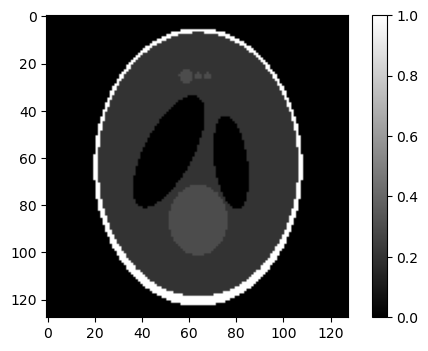

In [4]:
# Check phantom
f = plt.figure(dpi=100)
ax = f.subplots()
im = ax.imshow(np.abs(phantom), cmap='gray')
f.colorbar(im)

In [5]:
# Create trajectory
traj = trajectory.ga_radial_2d(nx, na)
na, ns, ndim = traj.shape
print(f'Trajectory: {traj.dtype}, {traj.shape}')
print(f'Min and Max: {traj.min()}, {traj.max()}')

Trajectory: float32, (400, 128, 2)
Min and Max: -64.0, 64.0


In [6]:
# Calculate density compensation
dcf = np.sqrt(traj[..., 0] ** 2 + traj[..., 1] ** 2)
dcf *= pi / na
print(f'Density compensation factor: {dcf.dtype}, {dcf.shape}')

Density compensation factor: float32, (400, 128)


In [7]:
# Simulate k-space
kspace = sp.nufft(phantom, traj)
print(f'k-space: {kspace.dtype}, {kspace.shape}')

k-space: complex64, (400, 128)


In [8]:
# Reconstruct
oshape = (nx, nx)
img = sp.nufft_adjoint(kspace * dcf, traj, oshape=oshape)
print(f'Reconstructed image: {img.dtype}, {img.shape}')

Reconstructed image: complex64, (128, 128)


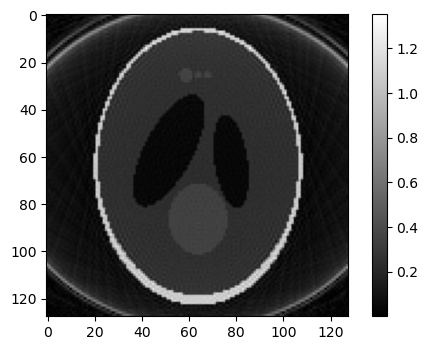

In [9]:
# Plot image
f = plt.figure(dpi=100)
ax = f.subplots()
im = ax.imshow(np.abs(img), cmap='gray')
f.colorbar(im)

The image has been reconstructed at the same FOV and spatial resolution used during the calculation of k-space. The following tests will show how the reconstructed FOV and spatial resolution can be modified.

Reconstructed image: complex64, (256, 256)


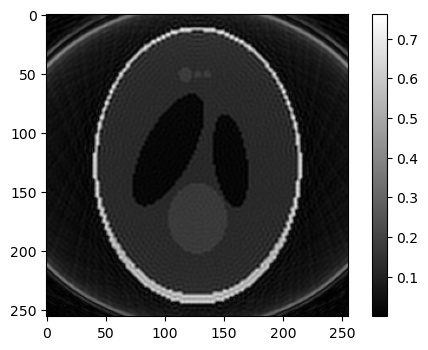

In [10]:
# Double spatial resolution, keep FOV the same
oshape = (2*nx, 2*nx)
img = sp.nufft_adjoint(kspace * dcf, traj, oshape=oshape)
print(f'Reconstructed image: {img.dtype}, {img.shape}')

f = plt.figure(dpi=100)
ax = f.subplots()
im = ax.imshow(np.abs(img), cmap='gray')
f.colorbar(im)

Reconstructed image: complex64, (128, 128)


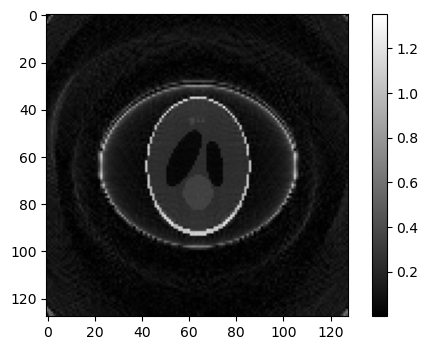

In [11]:
# Double FOV, half the spatial resolution
oshape = (nx, nx)
traj_fov = traj * 2
img = sp.nufft_adjoint(kspace * dcf, traj_fov, oshape=oshape)
print(f'Reconstructed image: {img.dtype}, {img.shape}')

f = plt.figure(dpi=100)
ax = f.subplots()
im = ax.imshow(np.abs(img), cmap='gray')
f.colorbar(im)

Reconstructed image: complex64, (256, 256)


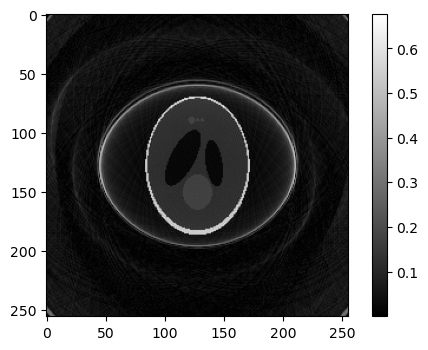

In [12]:
# Double FOV, double the spatial resolution
oshape = (2*nx, 2*nx)
traj_fov = traj * 2
img = sp.nufft_adjoint(kspace * dcf, traj_fov, oshape=oshape)
print(f'Reconstructed image: {img.dtype}, {img.shape}')

f = plt.figure(dpi=100)
ax = f.subplots()
im = ax.imshow(np.abs(img), cmap='gray')
f.colorbar(im)

For centre-out radial with ramp sampling, the FOV will define the sampling rate, and the matrix size will define how many samples are acquired per half-spoke. This means that the spatial resolution will be lower with ramp sampling than without ramp sampling.

Reconstructed image: complex64, (128, 128)
Trajectory min/max: -76.80000305175781, 76.80000305175781


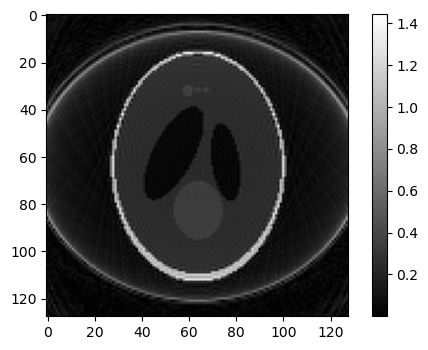

In [13]:
oshape = (nx // 1, nx // 1)
traj_fov = traj * 1.2
img = sp.nufft_adjoint(kspace * dcf, traj_fov, oshape=oshape)
print(f'Reconstructed image: {img.dtype}, {img.shape}')
print(f'Trajectory min/max: {traj_fov.min()}, {traj_fov.max()}')

f = plt.figure(dpi=100)
ax = f.subplots()
im = ax.imshow(np.abs(img), cmap='gray')
f.colorbar(im)

Multiplying the trajectory by a constant will modify the FOV. A factor greater than 1 will increase the FOV, and a factor smaller than 1 will decrease the FOV. The following should work to determine the reconstructed FOV from Siemens header parameters:

$a = (base resolution) \times (oversampling factor) / 2$

The trajectory should be defined from $-a$ to $a$.

This will reconstruct the FOV with oversampling taken into consideration. The spatial resolution can be modified by changing the output shape. The output shape can be calculated from the desired resolution:

$ output shape = FOV_{x} \times (oversampling factor) / (desired resolution) $

Notice that increasing the reconstructed FOV will not get rid of the artifact produced by a small FOV.

phantom: complex64, (192, 192)


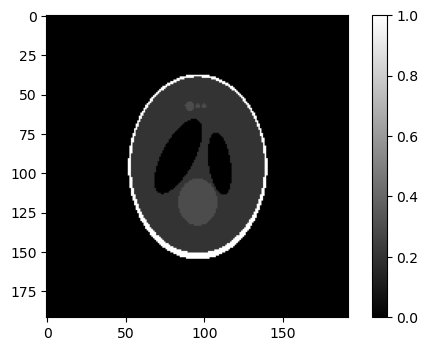

In [14]:
# Create phantom
phantom = sp.shepp_logan((nx, nx), dtype=np.complex64)
# Pad phantom to increase the acquired FOV
nx = int(1.5*nx)
na = int(1.5*na)
phantom = sp.resize(phantom, (nx, nx))
print(f'phantom: {phantom.dtype}, {phantom.shape}')

# Check phantom
f = plt.figure(dpi=100)
ax = f.subplots()
im = ax.imshow(np.abs(phantom), cmap='gray')
f.colorbar(im)

In [15]:
# Create trajectory
traj = trajectory.ga_radial_2d(nx, na)
na, ns, ndim = traj.shape
print(f'Trajectory: {traj.dtype}, {traj.shape}')
print(f'Min and Max: {traj.min()}, {traj.max()}')

# Calculate density compensation
dcf = np.sqrt(traj[..., 0] ** 2 + traj[..., 1] ** 2)
dcf *= pi / na
print(f'Density compensation factor: {dcf.dtype}, {dcf.shape}')

# Simulate k-space
kspace = sp.nufft(phantom, traj)
print(f'k-space: {kspace.dtype}, {kspace.shape}')

Trajectory: float32, (600, 192, 2)
Min and Max: -96.0, 96.0
Density compensation factor: float32, (600, 192)
k-space: complex64, (600, 192)


Reconstructed image: complex64, (192, 192)


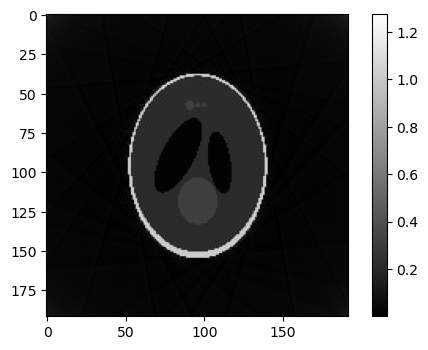

In [16]:
# Reconstruct
oshape = (nx, nx)
img = sp.nufft_adjoint(kspace * dcf, traj, oshape=oshape)
print(f'Reconstructed image: {img.dtype}, {img.shape}')

# Plot image
f = plt.figure(dpi=100)
ax = f.subplots()
im = ax.imshow(np.abs(img), cmap='gray')
f.colorbar(im)

Reconstructed image: complex64, (192, 192)
Trajectory min/max: -48.0, 48.0


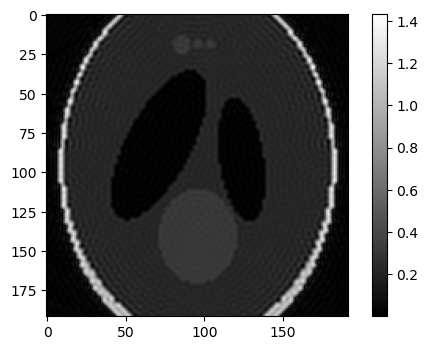

In [17]:
# Decrease FOV
oshape = (nx // 1, nx // 1)
traj_fov = traj * 0.5
img = sp.nufft_adjoint(kspace * dcf, traj_fov, oshape=oshape)
print(f'Reconstructed image: {img.dtype}, {img.shape}')
print(f'Trajectory min/max: {traj_fov.min()}, {traj_fov.max()}')

f = plt.figure(dpi=100)
ax = f.subplots()
im = ax.imshow(np.abs(img), cmap='gray')
f.colorbar(im)